## IRIS Database Generator
- Build IRIS database from .csv 
- Store ePROM data (SQL DB)
- Vectorize ePROM options (vector DB)

### Load ePROM data from csv

In [1]:
# Load data into dataframe 
import pandas as pd
df = pd.read_csv("ePROM data.csv")

# View data
df

,Question_number,Question,Options
0,0,Mobility,I have no problems in walking about
1,0,Mobility,I have slight problems in walking about
2,0,Mobility,I have moderate problems in walking about
3,0,Mobility,I have severe problems in walking about
4,0,Mobility,I am unable to walk about
5,1,Self-care,I have no problems washing or dressing myself
6,1,Self-care,I have slight problems washing or dressing myself
7,1,Self-care,I have moderate problems washing or dressing m...
8,1,Self-care,I have severe problems washing or dressing myself
9,1,Self-care,I am unable to wash or dress myself


### Create embeddings from ePROM options using BERT Sentence Transformers

In [ ]:
from sentence_transformers import SentenceTransformer

# Load pretrained Transformer model (we use 'all-MiniLM-L6-v2' lightweight multipurpose, can change later)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for ePROM options, append to dataframe
embeddings = model.encode(df['Options'].tolist(), normalize_embeddings=True)
df['Options_vector'] = embeddings.tolist()
df

,Question_number,Question,Options,Options_vector
0,0,Mobility,I have no problems in walking about,"[0.009168722666800022, -0.06617740541696548, 0..."
1,0,Mobility,I have slight problems in walking about,"[-0.007177032995969057, -0.0985264927148819, 0..."
2,0,Mobility,I have moderate problems in walking about,"[0.017007408663630486, -0.0892636775970459, 0...."
3,0,Mobility,I have severe problems in walking about,"[-0.021716685965657234, -0.0922291949391365, 0..."
4,0,Mobility,I am unable to walk about,"[-0.0005874783382751048, -0.08446122705936432,..."
5,1,Self-care,I have no problems washing or dressing myself,"[-0.04046596214175224, -0.002650185953825712, ..."
6,1,Self-care,I have slight problems washing or dressing myself,"[-0.02812831848859787, -0.031695108860731125, ..."
7,1,Self-care,I have moderate problems washing or dressing m...,"[-0.02003680355846882, -0.024189919233322144, ..."
8,1,Self-care,I have severe problems washing or dressing myself,"[-0.03613518178462982, -0.022469397634267807, ..."
9,1,Self-care,I am unable to wash or dress myself,"[0.0007849244866520166, 0.010105718858540058, ..."


### IRIS database operations

Management portal: http://localhost:52773/csp/sys/UtilHome.csp

In [21]:
# Import relevant libraries 
import iris
import os

In [22]:
# Connect to database
# Go to Docker and start IRIS instance before running this code section 

# Credentials 
username = 'demo'
password = 'demo'
hostname = os.getenv('IRIS_HOSTNAME', 'localhost')
port = '1972' 
namespace = 'USER'

# Concat connection string 
CONNECTION_STRING = f"{hostname}:{port}/{namespace}"

# Connect to IRIS
connect = iris.connect(CONNECTION_STRING, username, password)
try:
   cursor = connect.cursor()
except:
    print("Check that IRIS instance is running on Docker")

In [23]:
# Create IRIS table
table_name = "ePROM_DB"
table_definition ="(Question_number VARCHAR(255), Question VARCHAR(255), Options VARCHAR(255), Options_vector VECTOR(DOUBLE, 384))"

# Delete existing table (in case of multiple runs of this block)
try: 
    cursor.execute(f"DROP TABLE {table_name}")
    print('Existing table deleted and replaced')
except:
    print('No existing table conflict')
    pass

cursor.execute(f"CREATE TABLE {table_name} {table_definition}")

# Populate database with data from dataframe as a batch using SQL
sql_add_data = f"""
    INSERT INTO {table_name}
    (Question_number, Question, Options, Options_vector) 
    VALUES (?, ?, ?, TO_VECTOR(?))
"""
# Prepare list of tuples (parameter for each row)
data = [
    (
        row['Question_number'],
        row['Question'],
        row['Options'],
        str(row['Options_vector'])
    )
    for index, row in df.iterrows()
]

cursor.executemany(sql_add_data, data)

Existing table deleted and replaced


(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

### Viewing table Intersystems portal
To view table, log in to Intersystems Management Portal => systems explorer => SQL => Tables (select from dropdown SQLUser.ePROM_DB)

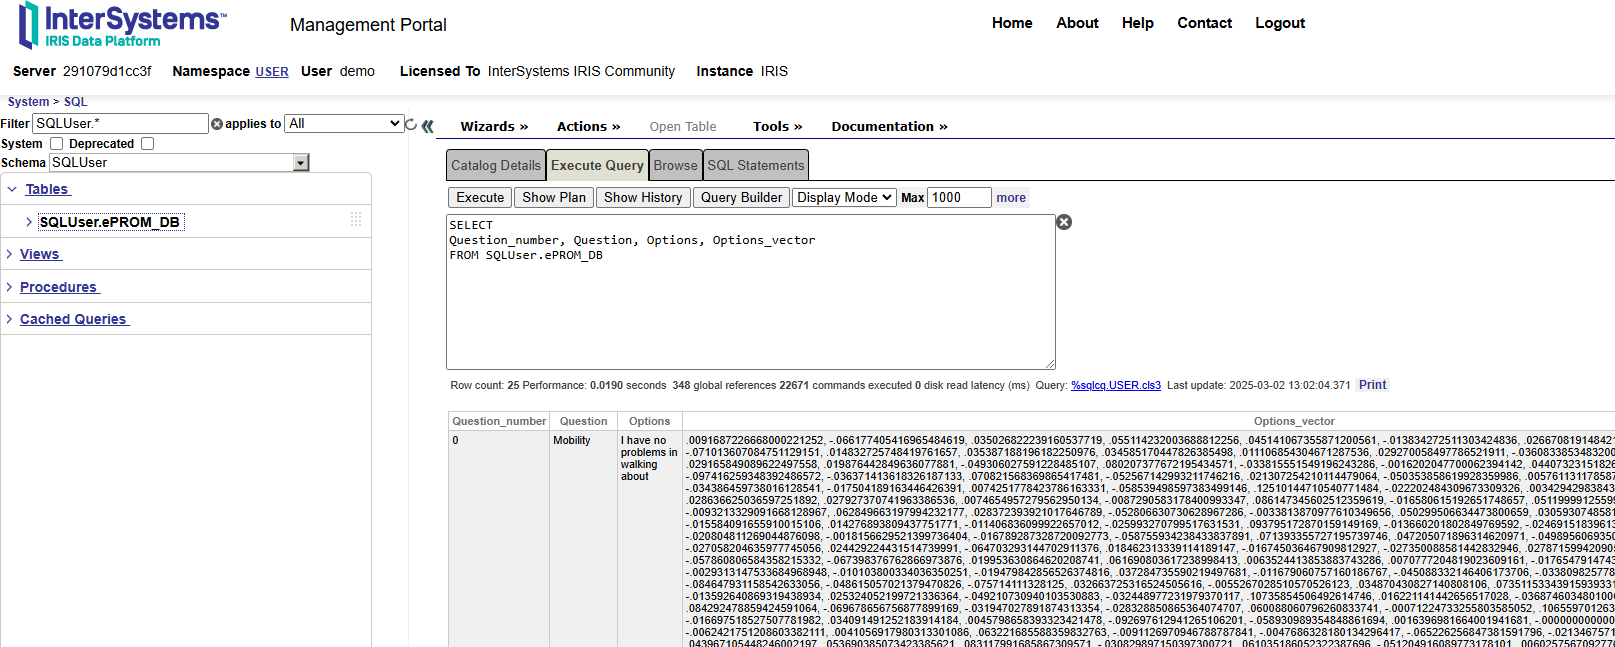

### Vector search test

In [ ]:
search_phrase = "" # Insert a string for vector search
search_vector = model.encode(search_phrase, normalize_embeddings=True).tolist() # Vectorize search phrase

# Define the SQL query with placeholders for the vector and limit, dot product similarity search
sql = f"""
    SELECT TOP ? Question_number, Question, Option,
    FROM {table_name}
    ORDER BY VECTOR_DOT_PRODUCT(Option_vector, TO_VECTOR(?)) DESC
"""
number_of_results = 1
query_vector = search_vector

# Execute SQL query
cursor.execute(sql, [number_of_results, str(query_vector)])

# Fetch results
results = cursor.fetchall()
for i in results:
    print(i)